<h1>Battery 0005 Dataset</h1>

In [280]:
import pandas as pd
import numpy as np
dataset_caharge=pd.read_csv("B0005_10_charge.csv")
dataset_discharge=pd.read_csv("B0005_10_discharge.csv")
data_set=pd.read_csv("B0005_discharge.csv")


In [281]:
#This function read eah row form the dataset and finds the current battery when the voltage drop to vol
def get_list_C_T(dataset, vol):
    cycle=1
    check=True
    current=0
    time=0.0
    sum_discharge=[]
    time_dis=[]
    for j in range(len(dataset_discharge)):
        if cycle == dataset['cycle'][j]:
            if dataset['voltage_battery'][j]>= vol and check:
                current=dataset['current_battery'][j]  
                time=dataset['time'][j]
            else:
                sum_discharge.append(current)
                time_dis.append(time)
                #check=False
        else:
            cycle=dataset_discharge['cycle'][j]
            current=0
    return sum_discharge,time_dis

In [282]:
# This function do Calculation SOC
def SOC_Cal(dataset,ini_cap,time_dis):
    list_SOC=[]
    Cap=[]
    SOC_0=1.0
    Cap.append(ini_cap)
    for i in range(len(dataset)):
        if i==0:
            SOC_0=1.0
            dt=time_dis[0]
            currents=dataset[0]
            list_SOC.append(SOC_0-((currents*1.0)/(ini_cap*3600)))
        else:
            dt=(time_dis[i] -time_dis[i-1])
            currents=(dataset[i])#+ sum_discharge[i-1])/2
            SOC_0=list_SOC[i-1]
            list_SOC.append(SOC_0-(((currents*dt))/(ini_cap*3600)))
            #Cap.append(SOC[i])
    return list_SOC

In [283]:
sum_discharge=[]
time_dis=[]
sum_discharge,time_dis=get_list_C_T(dataset_discharge,2.7)
print(len(sum_discharge))

168


In [284]:
SOC_0=1.0
dt=0.0
currents=0.0
SOC=[]
Cap=[]
res=[]
dt_ch=0.0

In [285]:
Cap.append(data_set['Capacity'][0])
Caps=data_set['Capacity'][0]
res=SOC_Cal(sum_discharge,Caps,time_dis)

In [286]:
#convert SOC to Capacity
Capacity=[]
for i in range(len(res)):
    Capacity.append(res[i]*Cap[0])

In [287]:
data_set['NewCap']=Capacity
data_set.to_csv("B0005_on.csv")

In [288]:
features=['cycle','Capacity','NewCap']
datasetNew=data_set[features]

In [289]:
print(datasetNew.head())

   cycle  Capacity    NewCap
0      1  1.856487  1.857047
1      2  1.846327  1.846953
2      3  1.835349  1.836084
3      4  1.835263  1.836136
4      5  1.834646  1.835061


Text(0.5, 1.0, 'Discharge B0005')

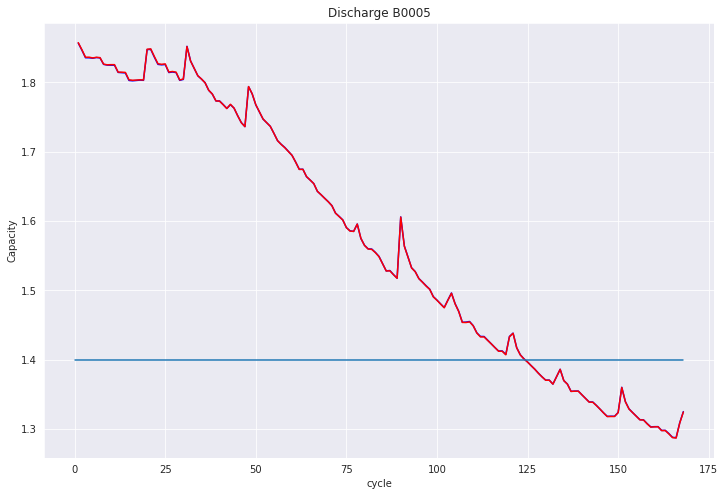

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = datasetNew.loc[(datasetNew['cycle']>=1),['cycle','Capacity']]
plot_df1 = datasetNew.loc[(datasetNew['cycle']>=1),['cycle','NewCap']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['Capacity'],color='blue')
plt.plot(plot_df1['cycle'], plot_df1['NewCap'],color='red')
#Draw threshold
plt.plot([0.,len(datasetNew)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

<h1> Battery 0006 Dataset</h1>

In [269]:
dataset_caharge=pd.read_csv("B0006_11_charge.csv")
dataset_discharge=pd.read_csv("B0006_11_discharge.csv")
data_set=pd.read_csv("B0006_discharge.csv")


In [270]:
cycle=1
check=True
sum_discharge1=[]
current=0
time=0.0
time_dis1=[]
sum_discharge1,time_dis1=get_list_C_T(dataset_discharge,2.5)

In [271]:
print(len(sum_discharge1))

168


In [272]:
SOC_0=1.0
dt=0.0
currents=0.0
SOC=[]
Cap=[]
res=[]
dt_ch=0.0

In [273]:
Cap.append(data_set['Capacity'][0])
Caps=data_set['Capacity'][0]
res=SOC_Cal(sum_discharge1,Caps,time_dis1)

In [274]:
#convert SOC to Capacity
Capacity=[]
for i in range(len(res)):
    Capacity.append(res[i]*Cap[0])

In [275]:
print(len(res))

168


In [276]:
data_set['NewCap']=Capacity
data_set.to_csv("B0006_on.csv")

In [277]:
features=['cycle','Capacity','NewCap']
datasetNew=data_set[features]

In [278]:
print(datasetNew.head())

   cycle  Capacity    NewCap
0      1  2.035338  2.035895
1      2  2.025140  2.025853
2      3  2.013326  2.014319
3      4  2.013285  2.003127
4      5  2.000528  2.001790


Text(0.5, 1.0, 'Discharge B0006')

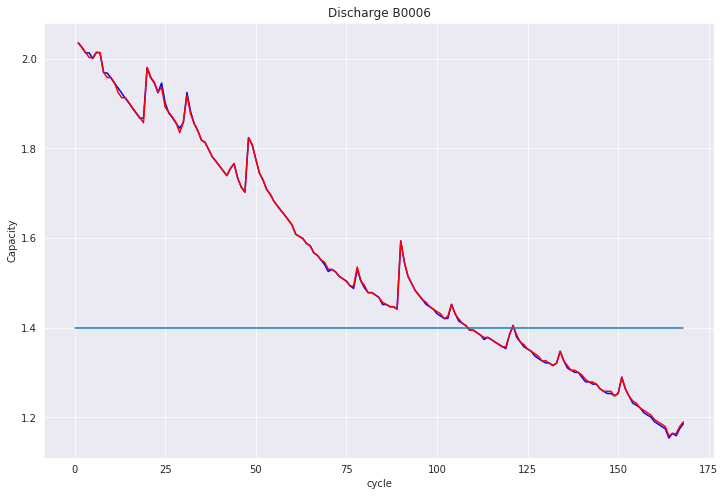

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = datasetNew.loc[(datasetNew['cycle']>=1),['cycle','Capacity']]
plot_df1 = datasetNew.loc[(datasetNew['cycle']>=1),['cycle','NewCap']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['Capacity'],color='blue')
plt.plot(plot_df1['cycle'], plot_df1['NewCap'],color='red')
#Draw threshold
plt.plot([0.,len(datasetNew)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0006')